# Aula 5 - Amostragem e Estatística Inferencial

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Amostragem - Pt. 1
- 3) Teorema central do limite
- 4) Testes de Hipótese
- 5) Correlação

___
___
___

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## 1) Introdução

Quando se prepara um macarrão, uma unidade desse é retirada para saber se o ponto de cozimento é o desejado.

Pra saber se uma sopa está corretamente salgada, experimentamos uma única colherada.

Quando um médico deseja identificar se um paciente está doente, alguns ml de sangue são retirados para análise. 

Em todos os casos acima, não seria conveniente analisar o todo, para chegar a uma conclusão satisfatória. De fato, o que fazemos é **tirar uma parte do todo** para validar alguma suposição.

Este procedimento é chamado de **amostragem**, e tem como objetivo **obter informações, tirar conclusões sobre o todo** com base na **análise de dados coletados de parte do todo (amostra)**.

A **inferência estatística** é a área que define:

- Como coletar as amostras do todo a serem analisadas;
- Como, e com que confiança, podemos generalizar as conclusões para o todo.


<center><img src="https://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2012/07/mod10-big_picture_inference.gif" width="700" height="700" /></center>

#### 1.1) Definições

**População** ou **Universo**: é o conjunto de todas as unidades elementares de interesse: o todo. A população sempre deve ser definida claramente e em termos da informação que se pretende conhecer;

**Unidade**: trata-se de qualquer elemento da populaçao;

**Amostra**: uma parte ou subconjunto da população;

**Censo**: observação de todos os elementos da população;

**Parâmetro Populacional**: é o vetor correspondente a todos os valores de uma variável de interesse. Pode ser qualitativa (gosto musical, opnião sobre o governo, etc) ou quantitativa (média, proporção, quantidade, etc).

**Estimadores pontuais**: são valores que **estimam** os parâmetros populacionais, calculados com base em uma amostra.
<br>

- Exemplos de parâmetros populacionais: 
    - média: $\mu$
    - diferença de médias: $\mu_1 - \mu_2$
    - proporção: $p$
    - diferença de proporções: $p1 - p2$
    
- Exemplos de estimadores de ponto: 
    - média: $\bar{x}$
    - diferença de médias: $\bar{x}_1 - \bar{x}_2$
    - proporção: $\hat{p}$
    - diferença de proporções: $\hat{p}_1 - \hat{p}_2$

___
____
____

## 2) Amostragem - Pt. 1

Veremos agora os principais conceitos e métodos da primeira etapa de todo estudo estatístico: a amostragem

_____________

### 2.1) Tipos de Amostragem

- **Amostra probabilística**: todos os elementos da população apresentam probabilidade maior que zero de serem selecionados


- **Amostra não probabilística**: quando não há probabilidade clara/conhecida de seleção dos elementos. Os elementos são escolhidos de forma julgamental.

Aqui, abordaremos apenas os métodos relacionados à **amostragem probabilística**, com o objetico de obter uma **amostra representativa**. 

Uma amostra é considerada representativa quando consegue **refletir as caracteristicas da população**.

Vamos ver os principais **métodos de amostragem**:

____


### 2.2) Amostra Aleatória Simples

Este é o método mais simples e mais importante de seleção de uma amostra, pois pode ser usada em combinação com outros métodos. A premissa assumida é que a população é homogênea com relação à característica de interesse.

A amostra aleatória simples pode ser realizada com ou sem reposição. No caso em que há reposição, cada elemento pode ser sorteado mais de uma vez. Para exemplificar, suponha que se queira sortear um número aleatório de uma urna, se for uma Amostra Aleatória Simples com preposição,  este número voltará para urna para participar do próximo sorteio. Se não houver reposição, cada elemento só poderá ser selecionado uma vez para compor a amostra.
 
Considere uma população formada por $N$ elementos (conhecido e finito). Este método consiste em selecionar $n$ elementos, sendo que cada elemento tem a mesma probabilidade de ser selecionado.

**Exemplo**: Considere uma população formada por 20 alunos. Selecionar de forma aleatória 5 alunos, **sem reposição**.

In [2]:
import random

pop = list(range(20))
print("População: ", pop, "\n")

amostra = random.sample(pop, 5)
print("Amostra: ", amostra)

População:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 

Amostra:  [15, 17, 3, 18, 2]


____

### 2.3) Amostra Estratificada

Trata-se do método em que a população é dividida em grupos (estratos) segundo alguma(s) característica(s) conhecida(s) na população sob estudo. 

São exemplos de estrato: gênero, faixa etária, região geográfica, profissão, etc. 

No geral, é usada quanto a população é heterogênea sob a ótica das características analisadas. 

Procedimento de amostragem:

- Dividir as $N$ unidades da população em $N_1, N_2, \cdots , N_j$ estratos distintos e homogêneos


- Selecionar, ao acaso, uma amostra de tamanhos $n_1, n_2, \cdots , n_j$ , de modo que o tamanho da amostra seja $n = n_1+n_2+ \cdots +n_j$. O tamanho amostral pode ser proporcional à representatividade do estrato


**Exemplo**: Considere a população formada pelos integrantes de uma escola. Dependendo do objetivo do estudo, esta população poderia ser dividida em alunos, professores, e demais funcionários (grupos mais homogêneos com relação à função na escola). 

Agora considere que a proporção de cada estrato seja: 50% alunos, 25% professores e 25% servidores. A amostragem poderia ser realizada dentro de cada estrato de forma que o tamanho amostral preserve esta característica. Sendo assim, se amostra total é $n$, a composição será $0,5 \times n$ de alunos, $0,25\times n$ de professores e $0,25\times n$ de servidores.

<img src="https://faculty.elgin.edu/dkernler/statistics/ch01/images/strata-sample.gif" width=400>


In [3]:
tamanho_amostra = 50

print("Tamanho da amostra de professores:", 0.25*tamanho_amostra)
print("Tamanho da amostra de alunos:", 0.5*tamanho_amostra)
print("Tamanho da amostra de servidores:", 0.25*tamanho_amostra)

Tamanho da amostra de professores: 12.5
Tamanho da amostra de alunos: 25.0
Tamanho da amostra de servidores: 12.5


____

### 2.4) Tamanho Amostral

Ao extrair uma amostra para inferir algo sobre a população, sempre há um erro associado ao **planejamento amostral**. 

A medida que o **tamanho da amostra aumenta**, o **erro do estimador diminui** (vide o TLC!). 

Vale ressaltar que uma amostra muito grande pode implicar em custos desnecessários, enquanto que uma amostra pequena pode tornar a pesquisa inconclusiva. 

Deste modo, o ponto chave de um levantamento amostral é determinar **o tamanho adequado da amostra** para que **os estimadores pontuais** sejam **estimados com confiança**!

Ou seja, queremos responder à pergunta:

> O quão confiantes estamos com relação aos estimadores pontuais que calcularmos com base em uma amostra?

Ou seja,

- A partir de $\bar{x}$, o que eu posso **inferir** sobre $\mu$?

- Ou, a partir de $\hat{p}$, o que eu posso **inferir** sobre $p$?

Para responder a estas perguntas, vamos introduzir uma das ideias mais poderosas da estatística: o **teorema central do limite**

____
____
____

## 3) Teorema do Limite Central (TLC, ou TCL)

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**. 

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal. 

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TLC mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, e depois veremos alguns exemplos:

> Seja uma **amostra aleatória** ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, média $\mu$ e desvio padrão $\sigma$. Para $n$ suficientemente grande ($n>30$), a **distribuição das médias amostrais**, $\overline{X}$, se **aproxima de uma distribuição normal** com média $\mu_{\overline{x}} = \mu$ e erro padrão $SE_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$. Isto é, $$\overline{X} \sim N \left(\mu, \frac{\sigma}{\sqrt{n}} \right)$$
OBS.: quando estamos falando do **estimador amostral do desvio padrão**, costumamos usar o termo **erro padrão** (standard error), denotado $SE$.

Existe também uma versão do TLC para a **a distribuição de porporções amostrais**:

> Seja uma **amostra aleatória** ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, que tem como parâmetro populacional a proporção $p$. Se $np \geq 10$ e $n(1-p) \geq 10$, a **distribuição das proporções amostrais**, $\hat{p}$, se **aproxima de uma distribuição normal** com média $\mu_{\hat{p}} = p$ e erro padrão $SE_{\hat{p}} = \sqrt{\frac{p(1-p)}{n}}$. Isto é, $$\hat{p} \sim N \left(p, \sqrt{\frac{p(1-p)}{n}} \right)$$
OBS.: como $p$ em geral é desconhecida, a condição de aplicação pode ser avaliada com: $n\hat{p} \geq 10$ e $n(1-\hat{p}) \geq 10$. 

O que o TLC para as médias diz, essencialmente, é:

> A distribuição de **médias das amostras** tiradas de **qualquer distribuição populacional** será **aproximadamente normal**, contanto que fizermos uma quantidade razoável de amostras com tamanho amostral $n>30$.

E, para as proporções:

> A distribuição de **proporções das amostras** tiradas de **qualquer distribuição populacional** será **aproximadamente normal**, contanto que fizermos uma quantidade razoável de amostras com tamanho amostral tal que $np \geq 10$ e $n(1-p) \geq 10$.

E isso é um resultado fantástico, pois nos permite a construção de uma **distribuição normal**, para a qual vale uma série de resultados e teoremas, a partir de **qualquer distribuição populacional**!

Vamos ver alguns exemplos:

____

__População: Distribuição Uniforme__

A **função densidade de probabilidade** da [distribuição uniforme](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) é dada por:

$$f(x) = \left\{\begin{matrix}
\frac{1}{b-a} \ ,  & a \leq x \leq b\\ 
0 \ , & x\leq a \ \text{ou} \  x \geq b
\end{matrix}\right.$$

Com:

$$ \mu = \frac{1}{2}(a + b) $$

$$ \sigma = \frac{1}{\sqrt{12}}(b-a) $$

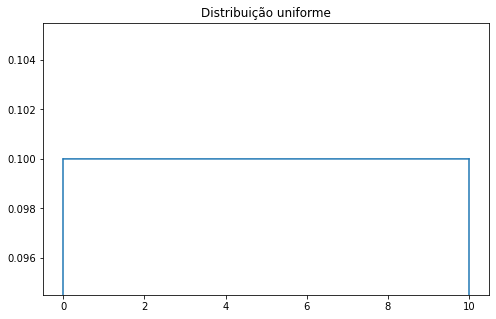

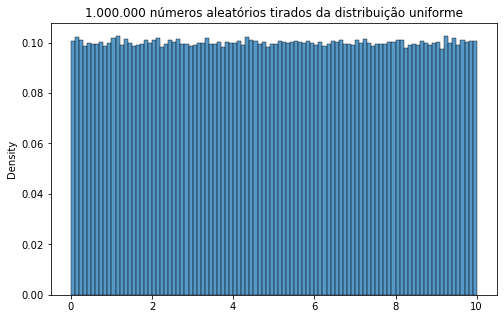


###############################################################

Média da distribuição populacional: 5.0
Desvio padrão da distribuição populacional: 2.886751345948129


In [4]:
plt.figure(figsize=(8, 5))
plt.title("Distribuição uniforme")

# x de 0 a 10
x = np.linspace(0, 10, 10000)

# y = f(x)
a = 0
b = 10
y = np.ones(10000)/(b-a)

plt.plot(x, y)
plt.axvline(x=0, ymax=0.5)
plt.axvline(x=10, ymax=0.5)

plt.show()

###############################################################

plt.figure(figsize=(8, 5))
plt.title("1.000.000 números aleatórios tirados da distribuição uniforme")

amostra=np.random.random(1000000)*10
sns.histplot(x=amostra, stat="density")

plt.show()

###############################################################

print("\n###############################################################\n")

print("Média da distribuição populacional:", 0.5*(a+b))
print("Desvio padrão da distribuição populacional:", (1/np.sqrt(12))*(b-a))

In [5]:
# tirando "num" amostras aleatórias de n=30 unidades

# configuração da amostragem
num=100
n=30

# lista de médias amostrais
medias_amostrais = []

for i in range(num):
   
    # amostra aleatória
    amst = np.random.random(n)*10 
    
    # media da amostra
    media_amostral = amst.mean()
    
    # apenda à lista
    medias_amostrais.append(media_amostral)
    

    print("Amostra número", i+1)
    print(amst)
    print("\nMédia da amostra:", media_amostral)

    print("\n########################################################## \n")

print("\n_____________________________________________________________________ \n")
print("\nDistribuição de médias amostrais:\n")
print(medias_amostrais)

Amostra número 1
[8.6210886  6.64858487 6.35872668 4.72447422 8.24783657 5.9686048
 9.6282914  8.82042525 1.02103562 5.63269007 7.30489618 3.26394963
 2.47273803 1.42199493 0.48511027 1.00494887 9.47547488 9.61365459
 2.13383343 0.16540998 0.50369882 1.45312976 2.67248654 3.50935231
 4.21084511 8.58348865 4.85425299 5.73776414 5.31491245 2.22437064]

Média da amostra: 4.735935675699417

########################################################## 

Amostra número 2
[1.6975774  2.05445166 7.77412345 8.2130541  9.63036065 6.00432419
 2.84023736 0.93757019 3.66584583 7.18747701 4.81166312 4.18864774
 8.17674513 8.83162152 6.73889901 2.72264089 0.15468354 6.43805797
 0.29805422 5.98931951 2.38659969 6.07651117 9.61727337 4.66314082
 3.46995749 3.15738138 2.19359994 6.50845793 0.22340089 8.36786552]

Média da amostra: 4.83398475711058

########################################################## 

Amostra número 3
[2.10651194 3.80831026 8.75263869 9.16008313 4.35308941 1.73447589
 4.80799069 9.

Média da amostra: 5.110485854310003

########################################################## 

Amostra número 84
[1.15202469 2.77331653 7.28133195 4.65828119 5.6305961  3.41493632
 8.99878285 8.90159791 8.8607267  5.77407401 2.51312853 4.34430801
 2.8521697  2.4528081  4.69152579 8.28698257 1.57641266 2.86585293
 2.50097122 2.96531156 6.04485236 9.79931856 8.60999855 3.17270305
 0.19708903 7.6321124  1.61973578 3.64063773 8.1839096  7.58850961]

Média da amostra: 4.966133532657476

########################################################## 

Amostra número 85
[4.05990872e+00 8.47241578e+00 5.03569799e+00 1.78224520e+00
 9.17280653e+00 8.32305520e+00 6.11969646e-01 5.23912741e+00
 9.87341550e+00 2.74050161e+00 3.62611404e+00 2.19983989e+00
 2.71061082e+00 4.10421987e-03 8.19548907e+00 3.11220639e+00
 3.35433890e+00 8.36813292e+00 3.16599122e+00 6.48179311e+00
 7.67649182e+00 2.84226034e+00 7.32490296e+00 1.51334193e+00
 9.65318262e+00 7.72935959e+00 2.00717679e+00 7.94907467e+00
 5.3

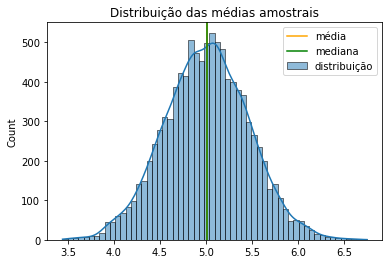


###############################################################

Média da distribuição de médias amostrais: 5.005994932518613 	 mediana: 5.009889887829408
Erro padrão da distribuição de médias amostrais: 0.45519550491839067
SE*sqrt(n): 2.8789091524249852

###############################################################

Média da distribuição populacional: 5.0
Desvio padrão da distribuição populacional: 2.886751345948129

###############################################################

Erro na estimativa da média: 0.005994932518612828


In [6]:
#_________________________________________________________
# amostragem

num=10000
n=40
medias_amostrais = [(np.random.random(n)*10).mean() for i in range(num)]

# medidas da distribuição amostral
media = np.array(medias_amostrais).mean()
std = np.array(medias_amostrais).std()
mediana = np.median(np.array(medias_amostrais))

#_________________________________________________________
# plot

plt.title("Distribuição das médias amostrais")

# distribuição
sns.histplot(medias_amostrais, kde=True, label="distribuição")

# reta da média
plt.axvline(media, label="média", color="orange")
# reta da mediana
plt.axvline(mediana, label="mediana", color="green")

plt.legend()
plt.show()

#_________________________________________________________
# infos

print("\n###############################################################\n")

print("Média da distribuição de médias amostrais:", media, "\t mediana:", mediana)
print("Erro padrão da distribuição de médias amostrais:", std)
print("SE*sqrt(n):", std*np.sqrt(n))

print("\n###############################################################\n")

print("Média da distribuição populacional:", 0.5*(a+b))
print("Desvio padrão da distribuição populacional:", (1/np.sqrt(12))*(b-a))

print("\n###############################################################\n")

print("Erro na estimativa da média:", abs(media - 0.5*(a+b)))

____

__População: Distribuição Gamma__

A **função densidade de probabilidade** da [distribuição gamma](https://en.wikipedia.org/wiki/Gamma_distribution) é dada por:

$$ f(x) = \frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} $$

Com:

$$ \mu = \frac{\alpha}{\beta} $$

$$ \sigma = \frac{\sqrt{\alpha}}{\beta} $$

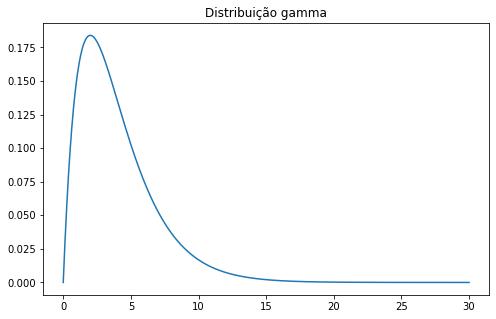

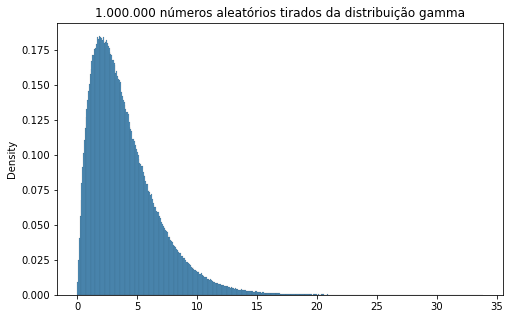


###############################################################

Média da distribuição populacional: 4.0
Desvio padrão da distribuição populacional: 2.8284271247461903


In [7]:
import scipy

plt.figure(figsize=(8, 5))
plt.title("Distribuição gamma")

# x de 0 a 10
x = np.linspace(0, 30, 10000)

# y = f(x)
alpha = 2
beta = 1/2
y = (beta**alpha)*(x**(alpha-1))*(np.exp(-beta*x))/scipy.special.gamma(alpha)

plt.plot(x, y)

plt.show()

###############################################################

plt.figure(figsize=(8, 5))
plt.title("1.000.000 números aleatórios tirados da distribuição gamma")

amostra=np.random.gamma(shape=alpha, scale=1/beta, size=1000000)

sns.histplot(x=amostra, stat="density")

plt.show()

###############################################################

print("\n###############################################################\n")

print("Média da distribuição populacional:", alpha/beta)
print("Desvio padrão da distribuição populacional:", np.sqrt(alpha)/beta)

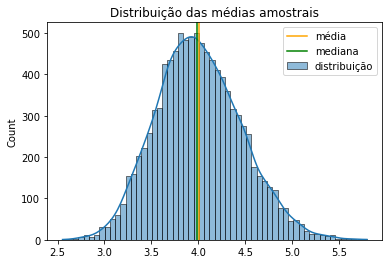


###############################################################

Média da distribuição de médias amostrais: 4.006373688363895 	 mediana: 3.9815479379665146
Erro padrão da distribuição de médias amostrais: 0.45114594684346854
SE*sqrt(n): 2.8532974983572235

###############################################################

Média da distribuição populacional: 4.0
Desvio padrão da distribuição populacional: 2.8284271247461903

###############################################################

Erro na estimativa da média: 0.006373688363894736


In [8]:
#_________________________________________________________
# amostragem

num=10000
n=40
medias_amostrais = [(np.random.gamma(shape=alpha, scale=1/beta, size=n)).mean() for i in range(num)]

# medidas da distribuição amostral
media = np.array(medias_amostrais).mean()
std = np.array(medias_amostrais).std()
mediana = np.median(np.array(medias_amostrais))

#_________________________________________________________
# plot

plt.title("Distribuição das médias amostrais")

# distribuição
sns.histplot(medias_amostrais, kde=True, label="distribuição")

# reta da média
plt.axvline(media, label="média", color="orange")
# reta da mediana
plt.axvline(mediana, label="mediana", color="green")

plt.legend()
plt.show()

#_________________________________________________________
# infos

print("\n###############################################################\n")

print("Média da distribuição de médias amostrais:", media, "\t mediana:", mediana)
print("Erro padrão da distribuição de médias amostrais:", std)
print("SE*sqrt(n):", std*np.sqrt(n))

print("\n###############################################################\n")

print("Média da distribuição populacional:", alpha/beta)
print("Desvio padrão da distribuição populacional:", np.sqrt(alpha)/beta)

print("\n###############################################################\n")

print("Erro na estimativa da média:", abs(media - alpha/beta))

____

__População: Distribuição exponencial__

A **função densidade de probabilidade** da [distribuição exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) é dada por:

$$f(x) = \left\{\begin{matrix}
\lambda e^{-\lambda x} \ ,  & x \geq 0\\ 
0 \ , & x <0
\end{matrix}\right.$$

Com:

$$ \mu = \frac{1}{\lambda} $$

$$ \sigma = \frac{1}{\lambda} $$

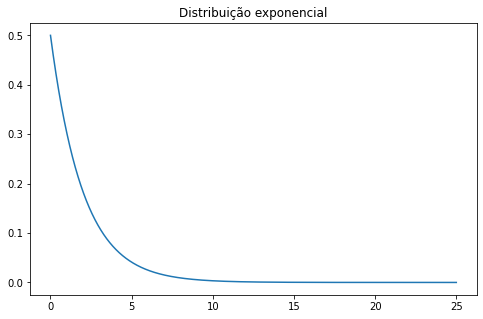

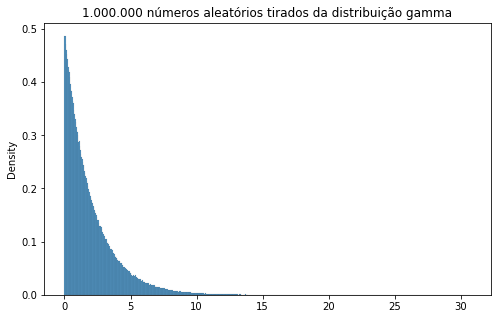


###############################################################

Média da distribuição populacional: 2.0
Desvio padrão da distribuição populacional: 2.0


In [9]:
plt.figure(figsize=(8, 5))
plt.title("Distribuição exponencial")

# x de 0 a 10
x = np.linspace(0, 25, 10000)

# y = f(x)
lbda = 0.5
y = lbda*np.exp(-lbda*x)

plt.plot(x, y)

plt.show()

###############################################################

plt.figure(figsize=(8, 5))
plt.title("1.000.000 números aleatórios tirados da distribuição gamma")

amostra=np.random.exponential(scale=1/lbda, size=1000000)

sns.histplot(x=amostra, stat="density")

plt.show()

###############################################################

print("\n###############################################################\n")

print("Média da distribuição populacional:", 1/lbda)
print("Desvio padrão da distribuição populacional:", 1/lbda)

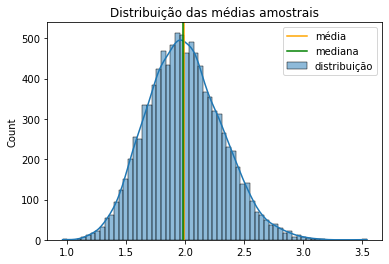


###############################################################

Média da distribuição de médias amostrais: 1.9977451997582212 	 mediana: 1.983947700764305
Erro padrão da distribuição de médias amostrais: 0.3175589965080029
SE*sqrt(n): 2.008419440885492

###############################################################

Média da distribuição populacional: 2.0
Desvio padrão da distribuição populacional: 2.0

###############################################################

Erro na estimativa da média: 0.0022548002417788204


In [10]:
#_________________________________________________________
# amostragem

num=10000
n=40
medias_amostrais = [(np.random.exponential(scale=1/lbda, size=n)).mean() for i in range(num)]

# medidas da distribuição amostral
media = np.array(medias_amostrais).mean()
std = np.array(medias_amostrais).std()
mediana = np.median(np.array(medias_amostrais))

#_________________________________________________________
# plot

plt.title("Distribuição das médias amostrais")

# distribuição
sns.histplot(medias_amostrais, kde=True, label="distribuição")

# reta da média
plt.axvline(media, label="média", color="orange")
# reta da mediana
plt.axvline(mediana, label="mediana", color="green")

plt.legend()
plt.show()

#_________________________________________________________
# infos

print("\n###############################################################\n")

print("Média da distribuição de médias amostrais:", media, "\t mediana:", mediana)
print("Erro padrão da distribuição de médias amostrais:", std)
print("SE*sqrt(n):", std*np.sqrt(n))

print("\n###############################################################\n")

print("Média da distribuição populacional:", 1/lbda)
print("Desvio padrão da distribuição populacional:", 1/lbda)

print("\n###############################################################\n")

print("Erro na estimativa da média:", abs(media - 1/lbda))

_____

### 3.1) Tá, mas e daí?

Vimos acima o TLC em ação, o que é bem legal.

Mas na prática, não é muito conveniente fazermos diversas amostras para termos uma distribuição amostral!

Na realidade, muitas vez temos recursos para fazer **apenas uma amostra**.

A boa notícia é que **se estivermos nas condições de aplicação do TLC**, isso é tudo que basta: **UMA AMOSTRA!**

Com uma única amostra, é possível calcularmos **nossos estimadores pontuais**, e, além disso (e mais importante): estimar uma **margem de erro** que nos dê, com certo grau de confiança, um intervalo de valores possíveis para o parâmetro populacional!

Vamos entender isso melhor...

_____

### 3.2) Intervalos de confiança

Quando calculamos um **estimador pontual** com base nos dados de uma amostra, esse valor do estimador é a **melhor (e única!) estimativa que temos para o parâmetro populacional**.

Mas, como este estimador foi calculado com base em um pedaço reduzido da população, é natural **haja uma diferença com relação ao parâmetro pessoal**.

> Por isso, é importante que tenhamos um **intervalo de valores possíveis** para a estimativa do parâmetro populacioonal ao invés do estimador pontual (daí o nome "pontual", aliás)

Especificar apenas o parâmetro populacional é como **pescar com uma lança**: é uma técnica precisa, mas tem alta chance de errar.

Se queremos ter mais chances de caputrar o peixe, seria melhor **usar uma rede**: menos precisa, mas mais segura.

O equivalente de "pescar com uma rede" é especificar um **intervalo de confiança**, ou seja, um **intervalo de valores para o parâmetro populacional**, com certo grau de confiança, ao invés de apresentarmos um único valor.

Como o estimador pontual é nosso melhor palpite para o parâmetro populacional, faz sentido que ele seja o centro do intervalo de confiança. Mas como definit os limites do intervalo?

<img src="https://i1.wp.com/itfeature.com/wp-content/uploads/2019/07/ci11.png?resize=644%2C216" width=500>


Para definir a **largura do intervalo de confiança**, utilizamos **o erro padrão**!

> Sabemos que, **dentro das hipóteses do TLC**,
- A **média da distribuição amostral será o parâmetro de interesse** ($\mu_{\bar{x}} = \mu$, $\mu_{\hat{p}} = p$);
- O erro padrão representa o **desvio padrão** do estimador pontual;
- A distribuição amostral do estimador será **aproximadamente normal**

Sabendo tudo isso, e sabendo que 95% dos dados estão centrados entre 1.96 desvios-padrão da dsitribuição normal,

<img src="https://www.simplypsychology.org/NormalDist1.96.png?ezimgfmt=rs:380x256/rscb24/ng:webp/ngcb24" width=400>

> **Podemos construir um intervalo de confiança que se estende 1.96 erros padrões (SEs) do estimador pontual para estarmos 95% confiantes de que o intervalo captura o parâmetro populacional!**

Isso significa que se fizéssemos **muitas amostras**, aproximadamente 95% dos intervalos de confiança construídos **conteriam o parâmetro populacional!**

<img src="https://lh3.googleusercontent.com/y0l2Oz0E1AWPhKL_6-v5AnKJbf_63hOPlmvWWMTrHyXt9gXuZGP6VmnWU6HElc2MAmqevJwrMk8WrXI99LWI-3vAdYfoyMJ6iak-R3a7oyZOuNO4iBZiobOtjKGkKL6q9hXQdaAB" width=900>

Assim,

> **Se a distribuição amostral de um estimador pontual $EP$ se enquadra nas condições do TLC, o intervalo de confiança de 95% é dado por $$\boxed{EP \pm 1.96 \  SE_{EP}}$$**

Ou seja, para o caso da **média**, temos $\bar{x} \pm 1.96 \ \frac{\sigma}{\sqrt{n}}$

E para o caso das proporções, $\hat{p} \pm 1.96 \ \sqrt{\frac{p(1-p)}{n}}$

Para diferentes graus de confiança, usamos diferentes multiplicadores

<img src="https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1729/2017/04/15032441/m9_inference_two_proportion_topic_9_2_m9_est_diff_two_pop_prop_2_image3.png" width=400>

> **IC de 90%: $\boxed{EP \pm 1.645 \  SE_{EP}}$**

> **IC de 99%: $\boxed{EP \pm 2.576 \  SE_{EP}}$**

Naturalmente, quanto **mais largo o IC**, mais **confiança você tem que o parâmetro populacional é capturado dentro do intervalo**: quanto maior a rede, mais chance vc tem de pegar o peixe!

### Agora deu pra perceber a importância de uma amostra grande?

Note as equações para o SE da média e da proporção:


Não somente um $n$ grande nos perimite usar o TLC (**e isso é um elemento fundamental de tudo o que fizemos!!**), como os SE são **inversamente proporcionais** a $\sqrt{n}$, de modo que $$\uparrow n  \ \ \Leftrightarrow  \ \downarrow SE \ \ \ \Leftrightarrow \  \downarrow IC$$

E, claro, quão menor é o IC, mais precisa é nossa estimativa para o parâmetro populacional!

Vamos agora a alguns exemplos!

_____


**Exemplo 1**: Uma pesquisa feita com 1000 adultos aleatoriamente selecionados revelou que 848 deles eram a favor da expansão do uso de energia eólica no país.

In [11]:
# qual é a proporção de pessoas, dentro desta amostra, que são a favor da 
# expansão do uso de energia eólica no pais?

n = 1000
quantidade = 848

p = quantidade/n

p

0.848

In [12]:
# você considera razoável modelar a propoção de cidadãos que são a favor da expansão do uso de
# energia eólica como uma distribuição normal?

print("Sim, pois a amostra é aleatória. Além do mais,\n")

print("n*p =", n*p)
print("n*(1-p) =", n*(1-p))

Sim, pois a amostra é aleatória. Além do mais,

n*p = 848.0
n*(1-p) = 152.00000000000003


In [13]:
# crie um IC de 95% para a proporção populacional de pessoas que são a favor da expansão do uso de
# energia eólica no país

print("Como confirmamos que o estimador segue uma distribuição normal, podemos usar o TLC!")

SE = np.sqrt(p*(1-p)/n)
print("\nO erro padrão da distribuição amostral é:", SE)

ic = 1.96*SE
print("\nPortanto, o intervalo de confiança de 95% para a proporção é:\n")

print("(", p-ic, p+ic, ")")

Como confirmamos que o estimador segue uma distribuição normal, podemos usar o TLC!

O erro padrão da distribuição amostral é: 0.011353237423748348

Portanto, o intervalo de confiança de 95% para a proporção é:

( 0.8257476546494532 0.8702523453505467 )


In [14]:
# como interpretar este resultado?

print("Estamos 95% confiantes que a proporção de cidadãos que são a favor")
print("da expansão do uso de energia eólica no país está entre",
      str(round((p-ic)*100,1)) + "%",
      "e", 
      str(round((p+ic)*100,1)) + "%")

Estamos 95% confiantes que a proporção de cidadãos que são a favor
da expansão do uso de energia eólica no país está entre 82.6% e 87.0%


_____

**Exemplo 2**: Vamos pegar a base de pesos e alturas:

In [15]:
df_wh = pd.read_csv('../datasets/weight-height.csv')

df_wh["Height"] = df_wh["Height"] * 2.54
df_wh["Weight"] = df_wh["Weight"] / 2.2046

df_wh

,Gender,Height,Weight
0,Male,187.571423,109.722200
1,Male,174.706036,73.623547
2,Male,188.239668,96.498619
3,Male,182.196685,99.810610
4,Male,177.499761,93.599656
...,...,...,...
9995,Female,168.078536,62.041846
9996,Female,170.350573,77.505174
9997,Female,162.224700,58.276022
9998,Female,175.346978,74.322989


In [16]:
# qual é a média de alturas e pesos dentre os diferentes sexos?

df_wh.groupby("Gender")[["Height", "Weight"]].agg(["mean"])

,Height,Weight
,mean,mean
Gender,,
Female,161.820285,61.625734
Male,175.326919,84.831997


In [17]:
# RESULTADO ESPERADO:

In [18]:
# é justo modelar as médias amostrais acima como normalmente distribuídas?

"sim, pois n>30, e vamos assumir amostra aleatória"

'sim, pois n>30, e vamos assumir amostra aleatória'

In [19]:
# calcule o SE das amostras de altura e peso de cada sexo

def SE(x):
    return x.std()/np.sqrt(len(x))

df_wh.groupby("Gender")[["Height", "Weight"]].agg(["mean", SE])

Height               Weight          
              mean        SE       mean        SE
Gender                                           
Female  161.820285  0.096853  61.625734  0.122026
Male    175.326919  0.102855  84.831997  0.126893

In [20]:
# RESULTADO ESPERADO:

In [21]:
# calcule agora o intervalo de confiança de 99% para as médias populacionais de altura e peso entre os sexos

def SE(x):
    return x.std()/np.sqrt(len(x))

def IC_95(x):
    
    ic_min = round(x.mean() - 1.96*SE(x), 2)
    
    ic_max = round(x.mean() + 1.96*SE(x), 2)
    
    return (ic_min, ic_max)

df_wh.groupby("Gender")[["Height", "Weight"]].agg(["mean", SE, IC_95])

Height                                 Weight            \
              mean        SE             IC_95       mean        SE   
Gender                                                                
Female  161.820285  0.096853  (161.63, 162.01)  61.625734  0.122026   
Male    175.326919  0.102855  (175.13, 175.53)  84.831997  0.126893   

                        
                 IC_95  
Gender                  
Female  (61.39, 61.86)  
Male    (84.58, 85.08)

In [22]:
# como interpretar este resultado?

"estamos 95% confiantes que a média de altura das mulheres está entre 1.61m e 1.62m"

'estamos 95% confiantes que a média de altura das mulheres está entre 1.61m e 1.62m'

___
___
___

## 4) Testes de Hipóteses

O exemplo que veremos a seguir é inspirado [neste estudo](https://psycnet.apa.org/record/1974-24190-001).

Imagine que você é o gestor de RH de uma empresa, e uma das metas de sua gestão é fazer com que não haja **discriminação de gênero** nos processos de promoção na empresa.

Mas antes de iniciar a campanha, é necessário que você responda à seguinte pergunta: **mulheres são prejudicadas em processos de promoção cuja decisão é feita por gestores homems?**

Para responder esta pergunta, você elabora o seguinte experimento:

- Pegue uma amostra aleatória de 48 gestores homens -- por exemplo, alunos de MBA de algumas faculdades;
- Peça para estes homens avaliarem um currículo de um candidato a promoções;
- Os currículos apresentados eram idênticos, mas metade deles tinham a marcação de pertencerem a mulheres, e a outra metade, de pertencerem a homems.
- Os currículos foram distribuídos aleatoriamente entre os participantes.

Para cada gestor, marcamos qual foi a decisão acerca da promoção, e o sexo indicado no currículo.

Os resultados estão descritos na tabela:

<table>
<thead>
  <tr>
    <th></th>
    <th></th>
    <th colspan="5"></th>
    <th></th>
  </tr>
</thead>
<tbody>
  <tr>
    <th></th>
    <th></th>
    <th colspan="2">Promotion</th>
    <th></th>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td>Promoted</td>
    <td>Not promoted</td>
    <td>Total</td>
  </tr>
  <tr>
    <th rowspan="2">Gender</th>
    <td>Male</td>
    <td>21</td>
    <td>3<br></td>
    <td>24</td>
  </tr>
  <tr>
    <td>Female</td>
    <td>14</td>
    <td>10</td>
    <td>24</td>
  </tr>
  <tr>
    <td></td>
    <td>Total</td>
    <td>35</td>
    <td>13<br></td>
    <td></td>
  </tr>
</tbody>
</table>

In [23]:
# qual a proporção de homens promovidos? (~88%)

p_h = 21/24

p_h

0.875

In [24]:
# qual a proporção de mulheres promovidas? (~58%)

p_m = 14/24

p_m

0.5833333333333334

Claramente há uma diferença na taxa de promoção entre homens e mulheres!

Mas antes de tirarmos alguma conclusão com base neste estudo, note que há **duas HIPÓTESES** possíveis (e opostas!) pra explicar o que tá acontecendo:

> **$H_0$: Não tá acontecendo nada demais!**
O fato de uma pessoa ser promovida e seu sexo **são independentes**.
Portanto, **não existe discriminação de gênero**.
E essa **diferença observada** entre as proporções ocorreram apenas **aleatoriamente**, devido a erros amostrais.

Chamamos a hipótese acima de **Hipótese nula** (Null hypothesis, H-nough). Esssa sempre será a hipótese **do status quo**, ou seja: *Não há diferença*, *tanto faz*, *as proporções são iguais*, *as médias são iguais*, etc. **Matematicamente: EXPRESSÕES DE IGUALDADE (=)**.

> **$H_1$: Opa, tem algo acontecendo aqui!**
O fato de uma pessoa ser promovida e seu sexo **são dependentes**.
Portanto, **existe sim discriminação de gênero**.
E essa **diferença observada** entre as proporções ocorreram **não** ocorreram aleatoiamente devido a erros amostrais.

Chamamos a hipótese acima de **Hipótese alternativa** (Alternative hypothesis, H-1). Essa é a hipótese **interessante**, e representa a nossa pergunta inicial, ou seja, o porquê de estarmos fazendo o experimento estatístico. **Matematicamente: EXPRESSÕES DE DESIGUALDADE (>, <, !=)**.

Temos as duas hipóteses acima. Agora, como decidimos a favor de uma ou outra?

**FAZEMOS UM TESTE DE HIPÓTESE!**

O **teste de hipótese** consiste em **determinar qual seria a chance de ocorrer o resultado observado OU um resultado ainda mais exrtremo DADO QUE a hipótese nula é verdadeira**.

Em termos matemáticos, nosso teste de hipótese é:

> $H_0: \ p_1 = p_2$

> $H_1: \ p_1 \neq p_2$

Que pode ser reescrito como:

> $H_0: \ p_1 - p_2 = 0$

> $H_1: \ p_1 - p_2 \neq 0$

Onde $p1 = \frac{21}{24}$ e $p2 = \frac{14}{24}$ são as respectivas proporções de promoção e $p_0 = 0$ é a chamada **proporção nula**, que assumimos ser verdadeira para a realização do teste de hipótese.

Agora, fazemos a pergunta: **assumindo que não há diferença entre as proporções, qual é a chance de ter encontrado a diferença observada de $\hat{p}_1 - \hat{p}_2 = 29,2\%$?**

Para isso, checamos que são válidas as condições para o TLC aplicado a **diferenças de proporções**:

> A diferença entre duas proporções, $\hat{p}_1 - \hat{p}_2$ pode ser modelada como uma distribuição normal se:
- Ambas as amostras são aleatórias e independentes entre si;
- A condição $n\hat{p} \geq 10$ e $n(1-\hat{p}) \geq 10$ é válida para ambos os grupos separadamente.
Neste caso, o erro padrão da estimativa será dado por 
$$SE = \sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}$$.



In [25]:
# cheque se as condições para o CLT são válidas

24*(21/24)

24*(1-21/24)

24*(1-14/24)

24*(14/24)

14.0

In [26]:
# calcule o SE para a distribuição de diferença de proporções
# obs: utilize as proporções amostrais para fazer este cálculo!

p1 = 21/24
p2 = 14/24

np.sqrt((p1*(1-p1)/24) + (p2*(1-p2)/24))

0.12118005810149408

In [27]:
0.292/0.12118005810149408

2.4096373988815554

Assumindo, então, que $H_0$ é verdadeira, temos que a distribuição da diferença de proporções é **centrada em $p_0 = 0$**. Esse é o **parâmetro populacional!**

Sendo assim, nos perguntamos: **qual seria a chance de, ao acaso, a amostra que coletamos ter sido tal que $\hat{p}_1 - \hat{p}_2 = 29,2\%$**?

Para facilitar este cálculo, calculamos o chamado **score padrão**, que é simplesmente dado por:

$$ Z = \frac{0.292 - 0}{0.12118} =  2.409 $$

Isso quer dizer que **a nosso estimador pontual amostral $\hat{p}_1 - \hat{p}_2 = 29,2\%$ se encontra 2.409 desvios-padrão deslocados com relação à média da distribuição**.

É sempre instrutivo fazer um gráfico para esta situação.

Obs.: note que a distribuição de $Z$ terá **desvio padrão 1**, por construção! Isto é, $ Z \sim (0, 1) $

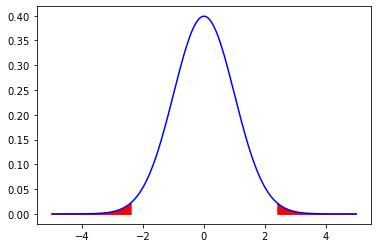

In [28]:
mean=0
std=1

# range total da distribuição
x_min = -5
x_max = 5
x=np.linspace(x_min, x_max, 1000)
y=scipy.stats.norm(mean, std).pdf(x)
plt.plot(x,y,'b')

# parte a preencher
z = 2.409

# se z < 0
x=np.linspace(x_min, -z, 1000)
y=scipy.stats.norm(mean, std).pdf(x)
plt.fill_between(x, y,color='r')

# z > 0
x=np.linspace(z, x_max, 1000)
y=scipy.stats.norm(mean, std).pdf(x)
plt.fill_between(x, y,color='r')

plt.show()

O **p-value** é a **área vermelha**! 

(Note como devemos considerar ambas as áreas!)

Para calcularmos o **p-value** podemos

In [29]:
scipy.stats.norm.sf(2.409)*2*100

1.5996297978338347

**E como interpretar o p-value?** 

Para isso, usamos um **nível de confiança**, que em geral é tomado como $\alpha = 5\%$.

Assim, 

> Se p-value $< \alpha$: **rejeitamos $H_0$**: os dados apresentam evidência convincente **a favor de $H_1$**;

> Se p-value $> \alpha$: **falhamos em rejeita $H_0$**: os dados NÃO apresentam evidência convincente **a favor de $H_1$**.
 
 
Como obtivemos um p-value de 1.6%, que é menor que 5%, podemos, com 5% de confiança, **rejeitar** a hipótese nula! Ou seja, **os nossos dados fornecem** evidências suficientemente fortes em favor da alternativa!

Portanto, chegamos à conclusão que, **sim**, existe uma diferença entre as taxa de promoção de cada gênero! Ou seja, **sim**, há discriminação de gênero!

Com isso, você, head de RH, pode tomar uma decisã **estatisticamente segura**, e **apoiada pelos dados** de que, sim, uma campanha de combate à segregação de gênero é importante!

_______

No geral, o framework de teste de hipótese é o seguinte:

> 1) Formule as hiipóteses H_0 e H_1 em termos de um estimador pontual $PE$

$$H_0: PE = PE_0$$

$$H_1: PE (<, >, \neq) PE_0$$

> 2) Calcule o estimador pontual com base na amostra;

> 3) Cheque as condições para a aplicação do TLC;

> 4) Calcule alguma **estatística de teste**. Nos nossos exemplos, o **score padrão**:

$$ Z = \frac{PE - PE_0}{SE} $$

> 5) Calcule o p-value

> 6) Faça uma decisão:

- Se o p-value for MENOR que o nível de confiança $\alpha$, **rejeitamos $H_0$**: os dados apresentam evidência convincente **a favor de $H_1$**;

- Se o p-value for MAIOR que o nível de confiança $\alpha$, **falhamos em rejeita $H_0$**: os dados NÃO apresentam evidência convincente **a favor de $H_1$**;
    

_____

### 4.1) Testes de Hipótese - um resumo

O processo de inferência estatística é o processo de inferir alguma propriedade acerca de uma população de dados a partir de uma amostra desses dados. Nesse processo, existe a ocorrência de um **erro estatístico** que irá depender do tamanho da amostra em relação ao tamanho da população. 

 - **Exemplo 1:** com base nas respostas de 5000 pessoas, tentar inferir qual será o resultado de uma eleição.

 - **Exemplo 2:** com base no uso de 300 consumidores de uma loja, tentar inferir qual será o comportamento dos consumidores de uma loja ao longo de um ano.

__4.1.1) Hipótese estatística__

É uma suposição acerca do comportamento de uma população. Exemplos:

 - **Exemplo 1:** a altura média da população brasileira é de 1,70m.
 - **Exemplo 2:** a proporção da população paulista com asma é de 0.4%
 
__4.1.2) Testes de hipótese__

É uma regra para aceitar ou rejeitar uma hipótese estatística com base em uma amostra da população. Para realizar um teste de hipóteses, deve-se escolher um par de hipóteses **complementares**, isso é, se uma for falsa a outra necessariamente deve ser verdadeira e vice-versa. Essas hipóteses são chamadas de **hipótese nula**, simbolizado por $H_0$ e **hipótese alternativa**, simbolizada por $H_1$.

Dessa forma, existem duas decisões possíveis:
1. Rejeita-se $H_0$; ou
2. Falha-se em rejeitar $H_0$.

Com isso, pode-se acertar de duas formas ou errar de duas formas. 

<table>
    <th> </th>
    <th style=" border: 1px solid black">$H_0$ é verdadeira</th>
    <th style=" border: 1px solid black">$H_1$ é verdadeira</th>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_0$ decidido</td>
        <td style=" border: 1px solid black">Decisão correta</td>
        <td style=" border: 1px solid black">Erro do tipo II</td>
    </tr>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_1$ decidido</td>
        <td style=" border: 1px solid black">Erro do tipo I</td>
        <td style=" border: 1px solid black">Decisão correta</td>
    </tr>
</table>

Cada um desses erros, o erro do tipo I ou o do tipo II, poderá ser quantizado através de uma probabilidade de ocorrência; isso é, o erro do tipo I terá uma probabilidade $\alpha$ de ocorrer, e o erro do tipo II terá uma probabilidade $\beta$ de ocorrer.


<table>
    <th> </th>
    <th style=" border: 1px solid black">$H_0$ é verdadeira</th>
    <th style=" border: 1px solid black">$H_1$ é verdadeira</th>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_0$ decidido</td>
        <td style=" border: 1px solid black">probabilidade 1-$\alpha$</td>
        <td style=" border: 1px solid black">probabilidade $\beta$</td>
    </tr>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_1$ decidido</td>
        <td style=" border: 1px solid black">probabilidade $\alpha$</td>
        <td style=" border: 1px solid black">probabilidade $1-\beta$</td>
    </tr>
</table>

____
____
____

## 5) Correlação

Um dos conceitos mais importantes em Data Science é o da **correlação**.

A partir de estudos de correlação, é possível **descobrirmos como diferentes variáveis interagem**.

<img src="https://www.mathsisfun.com/data/images/correlation-examples.svg" width=700>

É bem importante distinguirmos correlações **lineares** de **não lineares**. 

<img src="https://miro.medium.com/max/1414/1*ZMwog-_YcD0qBHc9_1T1-w.png" width=700>

Para fazer a distinção acima, há testes específicos!

Para ilustrar as noções de correlação, vamos utilizar uma base de dados de alturas e pesos:

### 5.1) Coeficiente de correlação de Pearson

Este coeficiente expressa a **taxa de relação linear entre duas variáveis numéricas**. Quanto mais próximo de 1 ou -1, mais **linearmente correlacionado estão as variáveis testadas**

**Suposições:**
 - as observações são idependentes uma das outras e identicamente distribuidas.
 - as observações têm distribuição normal;
 
 **Interpretações:**
 - $H_0$: as amostras são linearmente independentes, isso é, não estão correlacionadas linearmente;
 - $H_1$: as amostras estão linearmente correlacionadas.


Vamos ver um exemplo concreto, utilizando uma base que contém informações de [peso e altura](https://www.kaggle.com/mustafaali96/weight-height) de diversas pessoas

In [30]:
df_wh = pd.read_csv('../datasets/weight-height.csv')

In [31]:
df_wh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [32]:
# passando altura de polegadas pra centimetros
df_wh["Height"] = df_wh["Height"] * 2.54

# passando peso de libras pra quilos
df_wh["Weight"] = df_wh["Weight"] / 2.2046

df_wh

,Gender,Height,Weight
0,Male,187.571423,109.722200
1,Male,174.706036,73.623547
2,Male,188.239668,96.498619
3,Male,182.196685,99.810610
4,Male,177.499761,93.599656
...,...,...,...
9995,Female,168.078536,62.041846
9996,Female,170.350573,77.505174
9997,Female,162.224700,58.276022
9998,Female,175.346978,74.322989


In [33]:
df_wh.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228865
std,9.772721,14.564292
min,137.828359,29.347785
25%,161.304276,61.606664
50%,168.447898,73.125704
75%,175.702625,84.899540
max,200.656806,122.466524


Note que a mediana e a média são bem próximas... Isso é um indicativo de normalidade!

__Vamos dar uma olhada na distribuição da altura e do peso...__

<AxesSubplot:xlabel='Height', ylabel='Count'>

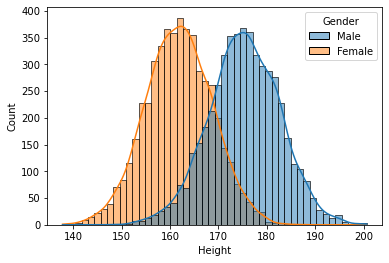

In [34]:
sns.histplot(data=df_wh, x="Height", hue="Gender", kde=True)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

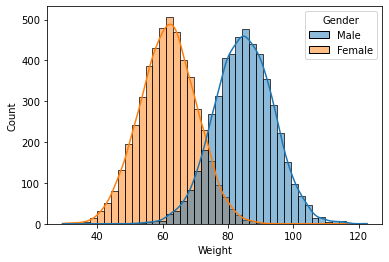

In [35]:
sns.histplot(data=df_wh, x="Weight", hue="Gender", kde=True)

Parece que as variáveis de fato são normalmente distribuídas!

Será que as variáveis estão relacionadas?

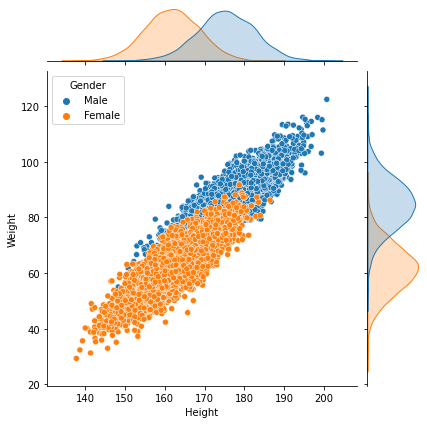

In [36]:
sns.jointplot(data=df_wh, x="Height", y="Weight", hue="Gender")

Vamos olhar separadamenter para o sexo...

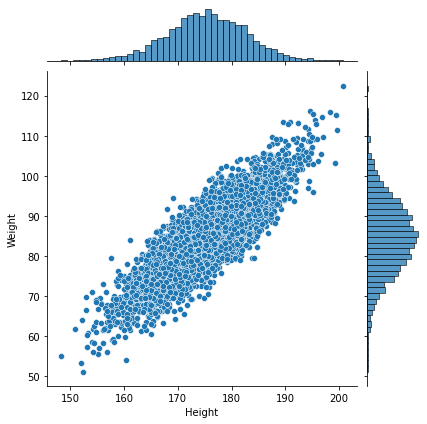

In [37]:
sns.jointplot(data=df_wh[df_wh["Gender"]=="Male"], x="Height", y="Weight")

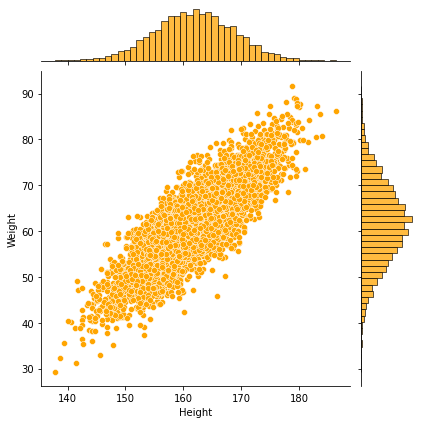

In [38]:
sns.jointplot(data=df_wh[df_wh["Gender"]=="Female"], x="Height", y="Weight", color="orange")

Aperentemente há uma relação **linear** entre as variáveis! 

Vamos dar uma olhada no teste de Pearson:

In [39]:
import scipy

scipy.stats.pearsonr(df_wh["Weight"], df_wh["Height"])

(0.9247562987409146, 0.0)

Separadamente para os sexos:

In [40]:
scipy.stats.pearsonr(df_wh[df_wh["Gender"] == "Male"]["Weight"], df_wh[df_wh["Gender"] == "Male"]["Height"])

(0.8629788486163177, 0.0)

In [41]:
scipy.stats.pearsonr(df_wh[df_wh["Gender"] == "Female"]["Weight"], df_wh[df_wh["Gender"] == "Female"]["Height"])

(0.8496085914186009, 0.0)

Em ambos os casos (e para todos os dados), obtivemos um coeficiente de pearson bem próxima de 1!

E o p-valor foi 0, isso é: rejeitamos $H_0$, o que implica que as duas amostras **estão correlacionadas linearmente**!

___________

### 5.2) Coeficiente de correlação de Spearman

Este coeficiente indica se as amostras possuem correlação *monotônica*, isso é, **se aumentarmos ou diminuimos uma, a outra irá aumentar ou diminuir**. 

O coeficiente varia entre -1 e 1:

> Quanto mais próximo de 1 for o coeficiente, mais positivamente correlacionada as amostras, isso é, se aumentarmos uma, a outra ira aumentar (ou se diminuimos uma, a outra irá diminuir); 

> Quanto mais próximo de -1 for o resultado, mais negativamente correlacionada estão as variáveis, isso é, aumentando uma, a outra irá dimunuir (ou se diminuímos uma, a outra irá aumentar). 

> Uma correlação de 0 indica ausência de correlação.

**Importante:** o coeficiente de Spearman **não** indica correlação necessariamente linear!

**Suposições:** 
 - as observações são idependentes uma das outras e identicamente distribuidas.

 
 **Interpretação:**
 - $H_0$: as variáveis são independentes; ou
 - $H_1$ as variáveis são monotonicamente dependentes.

Ao analisarmos os valores da base de altura e peso, é natural que tenhamos um coeficiente de Spearman próximo de 1, dado que percebemos claramente uma relação monotônica entre a svariáveis:

In [42]:
scipy.stats.spearmanr(df_wh[df_wh["Gender"] == "Female"]["Weight"], df_wh[df_wh["Gender"] == "Female"]["Height"])

SpearmanrResult(correlation=0.8364885471875417, pvalue=0.0)

In [43]:
scipy.stats.spearmanr(df_wh[df_wh["Gender"] == "Male"]["Weight"], df_wh[df_wh["Gender"] == "Male"]["Height"])

SpearmanrResult(correlation=0.8485589833503592, pvalue=0.0)

Vamos analisar outra base?

Desta vez, olharemos para uma base com informações relativas a [câncer de mama](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [44]:
df_bc = pd.read_csv('../datasets/breast_cancer.csv')

In [45]:
df_bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [46]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [47]:
df_bc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Vamos dar uma olhada na distribuição das variáveis numéricas! (E não precisamos olhar pro ID...)

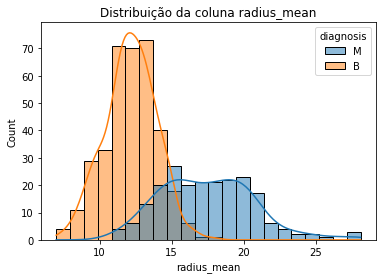

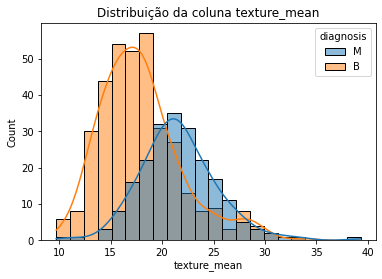

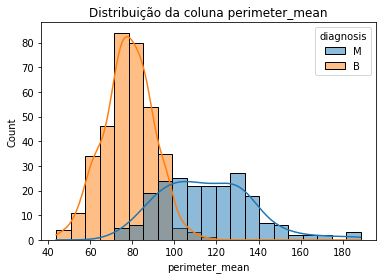

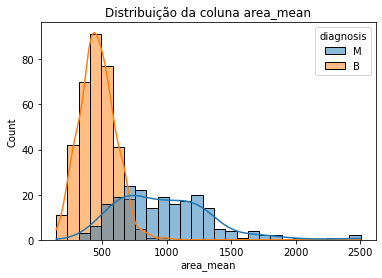

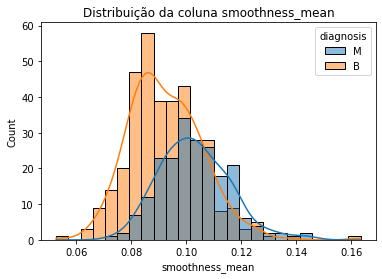

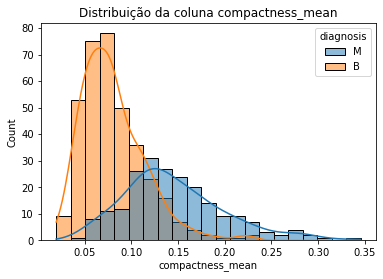

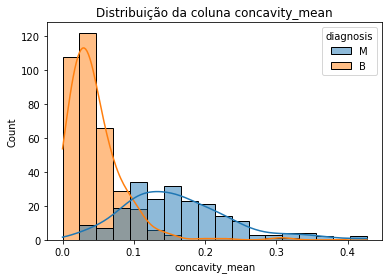

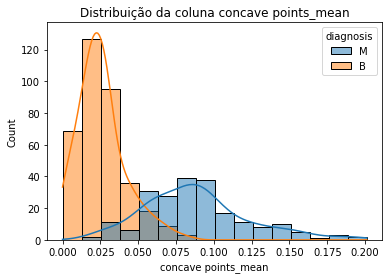

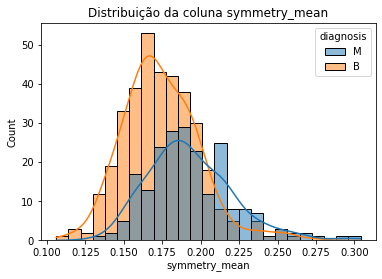

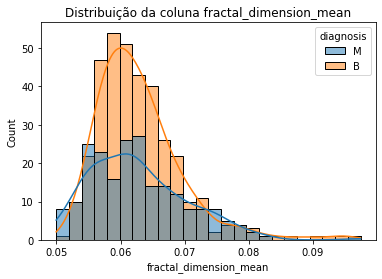

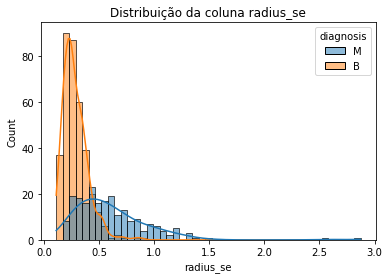

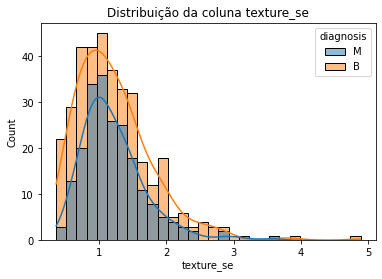

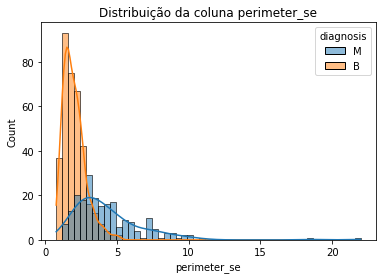

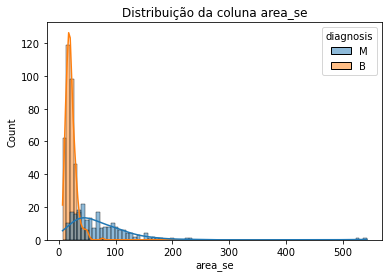

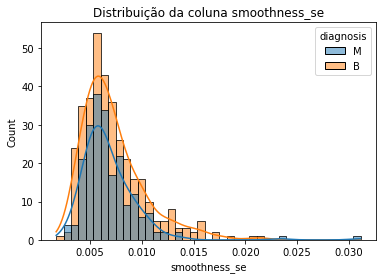

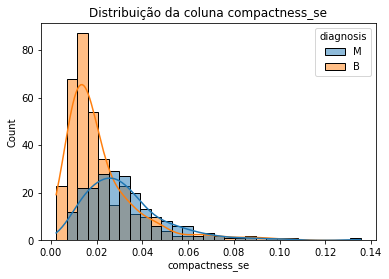

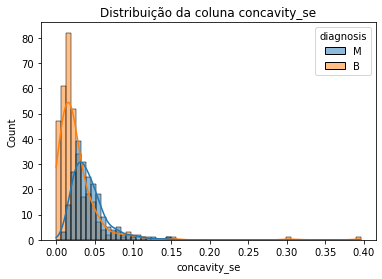

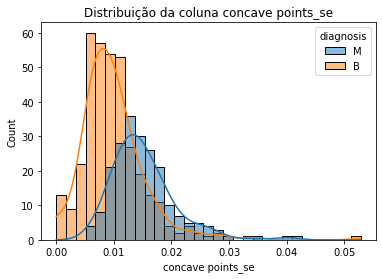

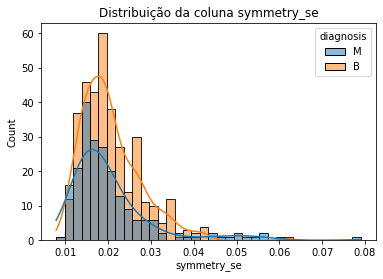

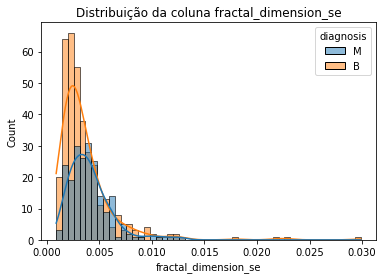

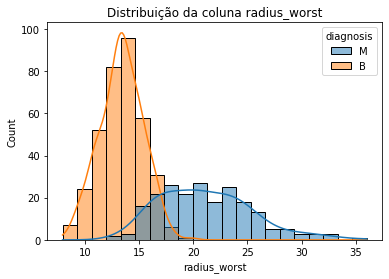

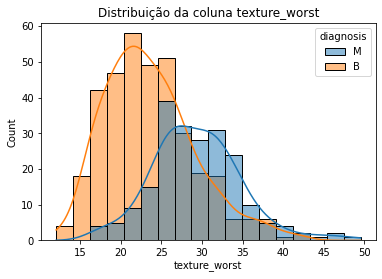

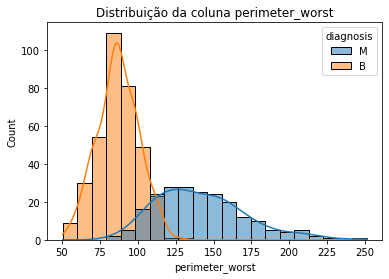

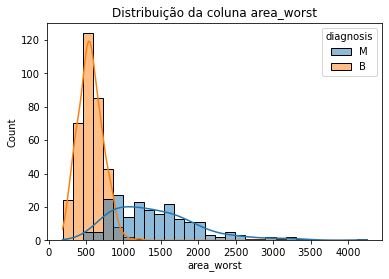

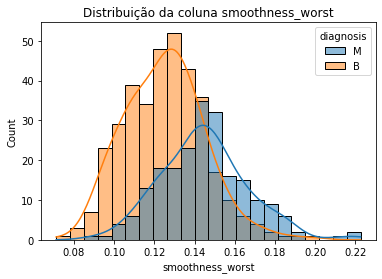

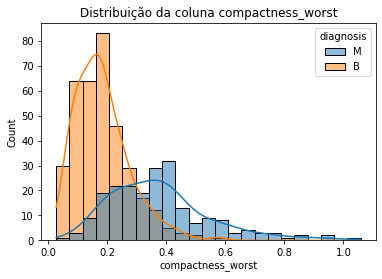

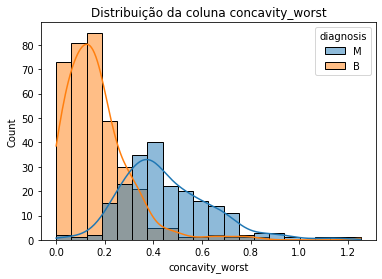

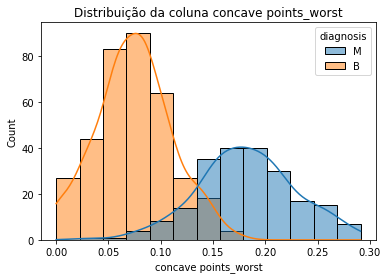

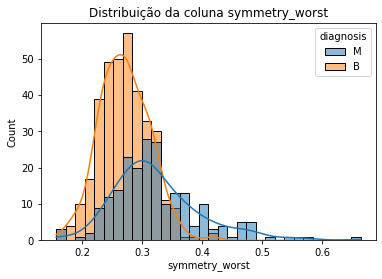

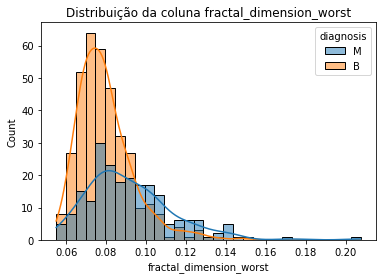

In [48]:
for col in df_bc.drop(columns=["id", "diagnosis"]).columns:
    
    plt.title("Distribuição da coluna " + col)
    
    sns.histplot(data = df_bc, x = col, kde=True, hue="diagnosis")

    plt.show()

Nenhuma tem distribuição normal... Neste caso, temos que usar o teste de correlação de spearman, para pelo menos buscarmos alguma correlação monotônica!

Vamos olhar, por exemplo, para as variáveis "radius_mean" e "area_mean":


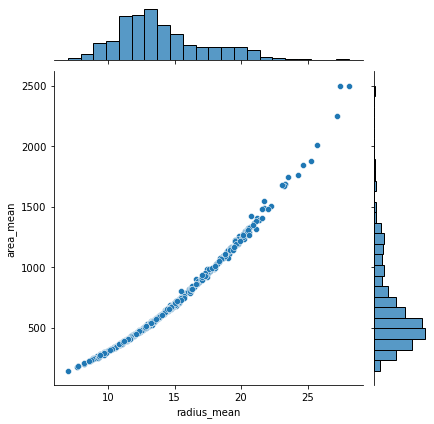

In [49]:
sns.jointplot(data=df_bc, x="radius_mean", y="area_mean")

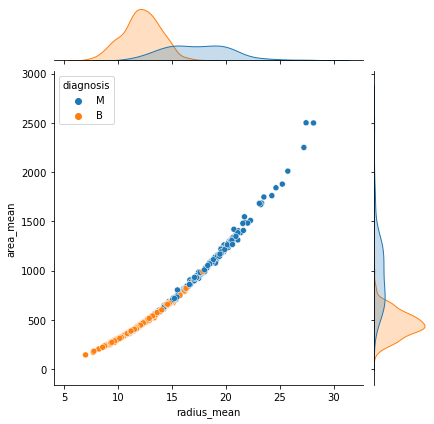

In [50]:
sns.jointplot(data=df_bc, x="radius_mean", y="area_mean", hue="diagnosis")

Claramente parece haver alguma correlação! Vamos ver o que o teste de spearman diz:

In [51]:
scipy.stats.spearmanr(df_bc["radius_mean"], df_bc["area_mean"])

SpearmanrResult(correlation=0.9996020278067481, pvalue=0.0)

Correlação bem próxima de 1, com p-value 0!

Dessa forma, com um nível de significância de 5%, rejeitamos $H_0$, ou seja, as variáveis **são positivamente monotônicamente dependentes!**

Caso queiramos avaliar a correlação de outras variáveis:

In [52]:
df_bc.corr(method="spearman")

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.043740,0.125809,0.043374,0.042829,-0.073225,-0.002247,0.000657,-0.003174,-0.001102,...,0.025451,0.077484,0.026199,0.023137,-0.080853,-0.011300,-0.013284,-0.012798,-0.064977,-0.090637
radius_mean,0.043740,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,...,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564
texture_mean,0.125809,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,...,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144
perimeter_mean,0.043374,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,...,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961
area_mean,0.042829,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,...,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758
smoothness_mean,-0.073225,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,...,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457
compactness_mean,-0.002247,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,...,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986
concavity_mean,0.000657,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,...,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838
concave points_mean,-0.003174,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,...,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110
symmetry_mean,-0.001102,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,...,0.164552,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069


<AxesSubplot:>

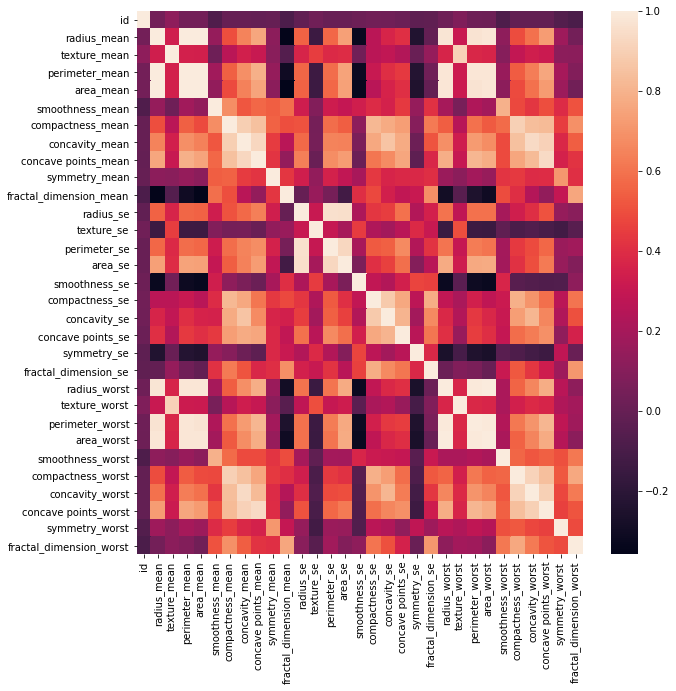

In [53]:
plt.figure(figsize=(10, 10))

sns.heatmap(df_bc.corr(method="spearman"))

<AxesSubplot:>

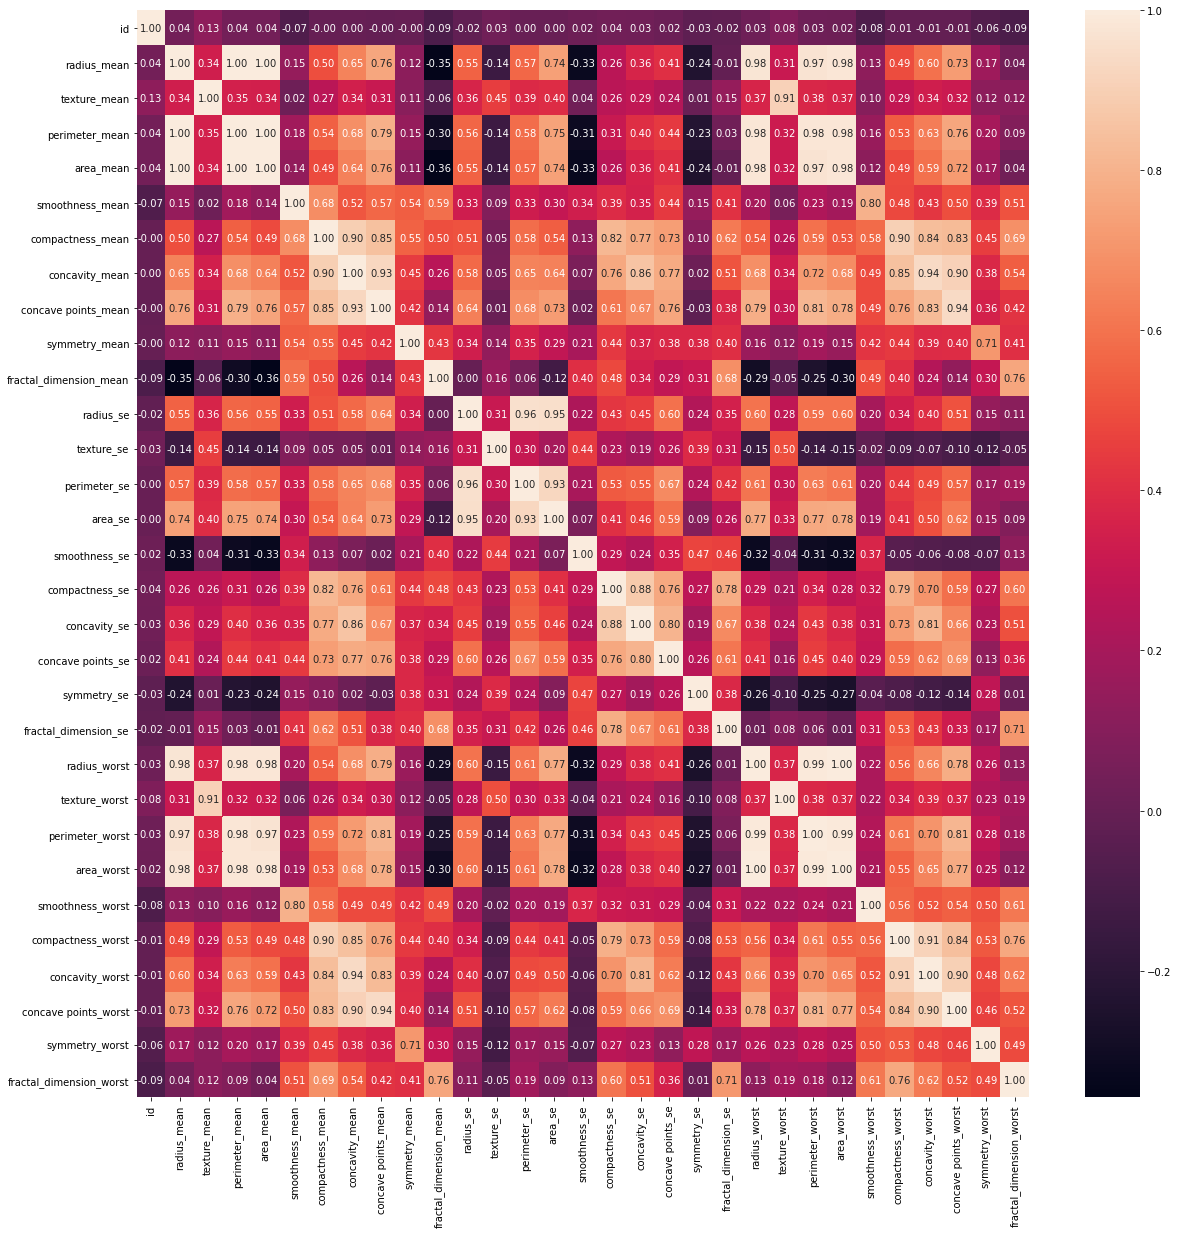

In [54]:
plt.figure(figsize=(20, 20))

sns.heatmap(df_bc.corr(method="spearman"), annot=True, fmt=".2f")